In [129]:
import pandas as pd
import numpy as np
import yfinance as yf
import math
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import pandas_ta as ta
import re
import string
import nltk
import seaborn as sns
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis.sklearn
from tensorflow.python.keras import models
from tensorflow.python.keras import layers
from IPython.core.display import clear_output
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from tensorflow.python.keras import models
from tensorflow.python.keras import layers
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from keras import callbacks
from IPython.core.display import clear_output
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.tag import pos_tag_sents
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import FreqDist
from nltk import classify
from nltk import NaiveBayesClassifier
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import NMF, LatentDirichletAllocation
import gensim
from gensim import corpora

/var/folders/qr/c62bp79j3c91gdkr6wydmq7h0000gn/T/ipykernel_28031/164213416.py:18: DeprecationWarning: Importing clear_output from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import clear_output
/var/folders/qr/c62bp79j3c91gdkr6wydmq7h0000gn/T/ipykernel_28031/164213416.py:29: DeprecationWarning: Importing clear_output from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import clear_output


In [71]:
articles = pd.read_csv("full_article2.txt", header = None)
articles.columns = ['Symbol', 'Article', 'Month-Day', 'Year']
articles['Year'] = articles['Year'].astype(str)
articles['Date'] = articles['Month-Day'] + " " + articles['Year']
articles['Date'] = articles['Date'].str.strip()
articles['Date'] = articles['Date'].str.slice(start = 2, stop = 13)
articles['Date'] = articles['Date'].str.strip()
articles = articles[['Symbol', 'Article', 'Date']]
articles

,Symbol,Article,Date
0,MO,The other big story Monday was oil storming h...,Mar 22 2022
1,MO,By Peter NurseInvesting.com -- Stocks in focu...,Mar 22 2022
2,MO,The members of this alcohol and tobacco indus...,Mar 17 2022
3,MO,(Reuters) - An administrative law judge dismi...,Feb 24 2022
4,MO,WASHINGTON (Reuters) -A judge at the U.S. Fed...,Feb 15 2022
...,...,...,...
6365,AAPL,By Stephen Nellis(Reuters) - If Nvidia Corp ...,Oct 07 2020
6366,AAPL,By Yasin EbrahimInvesting.com – The Dow ralli...,Oct 07 2020
6367,AAPL,By Geoffrey Smith Investing.com -- Donald Tru...,Oct 06 2020
6368,AAPL,By Sruthi Shankar(Reuters) - European stocks ...,Oct 06 2020


In [72]:
len(articles.iloc[0]['Date'])

11

In [77]:
articles.at[articles[articles['Date'].str.contains('hours') == True].index, 'Date'] = 'Apr 06 2022'
articles = articles[articles['Date'].str.len() == 11]
articles['Date'] = pd.to_datetime(articles['Date'], format = '%b %d %Y')
articles

/Users/ryanshintaku/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/ryanshintaku/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:691: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,Symbol,Article,Date
0,MO,The other big story Monday was oil storming h...,2022-03-22
1,MO,By Peter NurseInvesting.com -- Stocks in focu...,2022-03-22
2,MO,The members of this alcohol and tobacco indus...,2022-03-17
3,MO,(Reuters) - An administrative law judge dismi...,2022-02-24
4,MO,WASHINGTON (Reuters) -A judge at the U.S. Fed...,2022-02-15
...,...,...,...
6365,AAPL,By Stephen Nellis(Reuters) - If Nvidia Corp ...,2020-10-07
6366,AAPL,By Yasin EbrahimInvesting.com – The Dow ralli...,2020-10-07
6367,AAPL,By Geoffrey Smith Investing.com -- Donald Tru...,2020-10-06
6368,AAPL,By Sruthi Shankar(Reuters) - European stocks ...,2020-10-06


In [78]:
df = articles.copy()
df

,Symbol,Article,Date
0,MO,The other big story Monday was oil storming h...,2022-03-22
1,MO,By Peter NurseInvesting.com -- Stocks in focu...,2022-03-22
2,MO,The members of this alcohol and tobacco indus...,2022-03-17
3,MO,(Reuters) - An administrative law judge dismi...,2022-02-24
4,MO,WASHINGTON (Reuters) -A judge at the U.S. Fed...,2022-02-15
...,...,...,...
6365,AAPL,By Stephen Nellis(Reuters) - If Nvidia Corp ...,2020-10-07
6366,AAPL,By Yasin EbrahimInvesting.com – The Dow ralli...,2020-10-07
6367,AAPL,By Geoffrey Smith Investing.com -- Donald Tru...,2020-10-06
6368,AAPL,By Sruthi Shankar(Reuters) - European stocks ...,2020-10-06


In [80]:
def lemmatize_sentence(tokens):
    lemmatizer = WordNetLemmatizer()
    sentence = []
    for word, tag in tokens:
        if tag.startswith('NN'):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v' 
        else:
            pos = 'a'
        sentence.append(lemmatizer.lemmatize(word, pos))
    return sentence

In [81]:
df['title/no_stopwords'] = df.apply(lambda row: pos_tag(word_tokenize(row['Article'])), axis = 1)
df['title/no_stopwords'] = df.apply(lambda row: lemmatize_sentence(row['title/no_stopwords']), axis = 1)
df

,Symbol,Article,Date,title/no_stopwords
0,MO,The other big story Monday was oil storming h...,2022-03-22,"[The, other, big, story, Monday, be, oil, stor..."
1,MO,By Peter NurseInvesting.com -- Stocks in focu...,2022-03-22,"[By, Peter, NurseInvesting.com, --, Stocks, in..."
2,MO,The members of this alcohol and tobacco indus...,2022-03-17,"[The, member, of, this, alcohol, and, tobacco,..."
3,MO,(Reuters) - An administrative law judge dismi...,2022-02-24,"[(, Reuters, ), -, An, administrative, law, ju..."
4,MO,WASHINGTON (Reuters) -A judge at the U.S. Fed...,2022-02-15,"[WASHINGTON, (, Reuters, ), -A, judge, at, the..."
...,...,...,...,...
6365,AAPL,By Stephen Nellis(Reuters) - If Nvidia Corp ...,2020-10-07,"[By, Stephen, Nellis, (, Reuters, ), -, If, Nv..."
6366,AAPL,By Yasin EbrahimInvesting.com – The Dow ralli...,2020-10-07,"[By, Yasin, EbrahimInvesting.com, –, The, Dow,..."
6367,AAPL,By Geoffrey Smith Investing.com -- Donald Tru...,2020-10-06,"[By, Geoffrey, Smith, Investing.com, --, Donal..."
6368,AAPL,By Sruthi Shankar(Reuters) - European stocks ...,2020-10-06,"[By, Sruthi, Shankar, (, Reuters, ), -, Europe..."


In [119]:
def remove_noise(reviews, stop_words = ()):

    cleaned_tokens = []

    for token in reviews:
        token = token.strip()
        token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', token)
        token = re.sub("(@[A-Za-z0-9_]+)","", token)
        token = token.replace('--', '')
        token = token.replace('-', '')
        token = token.replace('–', '')
        token = token.replace('investing.com', '')
        token = token.replace('``', '')
        token = token.replace("'s", '')
        token = token.replace('..', '')
        token = token.replace('...', '')
        token = token.replace("'", '')
        token = token.replace("’",'')

        if len(token) > 0 and token not in string.punctuation and token.lower() not in stop_words:
            cleaned_tokens.append(token.lower())
    return cleaned_tokens

<>:7: DeprecationWarning: invalid escape sequence \(
<>:7: DeprecationWarning: invalid escape sequence \(
/var/folders/qr/c62bp79j3c91gdkr6wydmq7h0000gn/T/ipykernel_28031/3775124540.py:7: DeprecationWarning: invalid escape sequence \(
  token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\


In [120]:
stop_words = list(stopwords.words('english'))
df['title/no_stopwords'] = df.apply(lambda row: remove_noise(row['title/no_stopwords'], stop_words), axis = 1)
df

,Symbol,Article,Date,title/no_stopwords,title/clean
0,MO,The other big story Monday was oil storming h...,2022-03-22,"[big, story, monday, oil, storm, high, 6, decl...",big story monday oil storm high 6 decline last...
1,MO,By Peter NurseInvesting.com -- Stocks in focu...,2022-03-22,"[peter, nurse, stocks, focus, premarket, trade...",peter nurse stocks focus premarket trade tuesd...
2,MO,The members of this alcohol and tobacco indus...,2022-03-17,"[member, alcohol, tobacco, industrybacked, mar...",member alcohol tobacco industrybacked marijuan...
3,MO,(Reuters) - An administrative law judge dismi...,2022-02-24,"[reuters, administrative, law, judge, dismiss,...",reuters administrative law judge dismiss feder...
4,MO,WASHINGTON (Reuters) -A judge at the U.S. Fed...,2022-02-15,"[washington, reuters, judge, u.s., federal, tr...",washington reuters judge u.s. federal trade co...
...,...,...,...,...,...
6365,AAPL,By Stephen Nellis(Reuters) - If Nvidia Corp ...,2020-10-07,"[stephen, nellis, reuters, nvidia, corp, nvda,...",stephen nellis reuters nvidia corp nvda buy ar...
6366,AAPL,By Yasin EbrahimInvesting.com – The Dow ralli...,2020-10-07,"[yasin, ebrahim, dow, rally, wednesday, lead, ...",yasin ebrahim dow rally wednesday lead surge a...
6367,AAPL,By Geoffrey Smith Investing.com -- Donald Tru...,2020-10-06,"[geoffrey, smith, donald, trump, return, white...",geoffrey smith donald trump return white house...
6368,AAPL,By Sruthi Shankar(Reuters) - European stocks ...,2020-10-06,"[sruthi, shankar, reuters, european, stock, ea...",sruthi shankar reuters european stock ease two...


In [121]:
df['title/clean'] = df.apply(lambda row: ' '.join(row['title/no_stopwords']), axis = 1)
df

,Symbol,Article,Date,title/no_stopwords,title/clean
0,MO,The other big story Monday was oil storming h...,2022-03-22,"[big, story, monday, oil, storm, high, 6, decl...",big story monday oil storm high 6 decline last...
1,MO,By Peter NurseInvesting.com -- Stocks in focu...,2022-03-22,"[peter, nurse, stocks, focus, premarket, trade...",peter nurse stocks focus premarket trade tuesd...
2,MO,The members of this alcohol and tobacco indus...,2022-03-17,"[member, alcohol, tobacco, industrybacked, mar...",member alcohol tobacco industrybacked marijuan...
3,MO,(Reuters) - An administrative law judge dismi...,2022-02-24,"[reuters, administrative, law, judge, dismiss,...",reuters administrative law judge dismiss feder...
4,MO,WASHINGTON (Reuters) -A judge at the U.S. Fed...,2022-02-15,"[washington, reuters, judge, u.s., federal, tr...",washington reuters judge u.s. federal trade co...
...,...,...,...,...,...
6365,AAPL,By Stephen Nellis(Reuters) - If Nvidia Corp ...,2020-10-07,"[stephen, nellis, reuters, nvidia, corp, nvda,...",stephen nellis reuters nvidia corp nvda buy ar...
6366,AAPL,By Yasin EbrahimInvesting.com – The Dow ralli...,2020-10-07,"[yasin, ebrahim, dow, rally, wednesday, lead, ...",yasin ebrahim dow rally wednesday lead surge a...
6367,AAPL,By Geoffrey Smith Investing.com -- Donald Tru...,2020-10-06,"[geoffrey, smith, donald, trump, return, white...",geoffrey smith donald trump return white house...
6368,AAPL,By Sruthi Shankar(Reuters) - European stocks ...,2020-10-06,"[sruthi, shankar, reuters, european, stock, ea...",sruthi shankar reuters european stock ease two...


In [122]:
def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()

    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

    # selecting top 20 most frequent words
    d = words_df.nlargest(columns="count", n = terms) 
    plt.figure(figsize=(20,5))
    ax = sns.barplot(data=d, x= "word", y = "count")
    ax.set(ylabel = 'Count')
    plt.show()

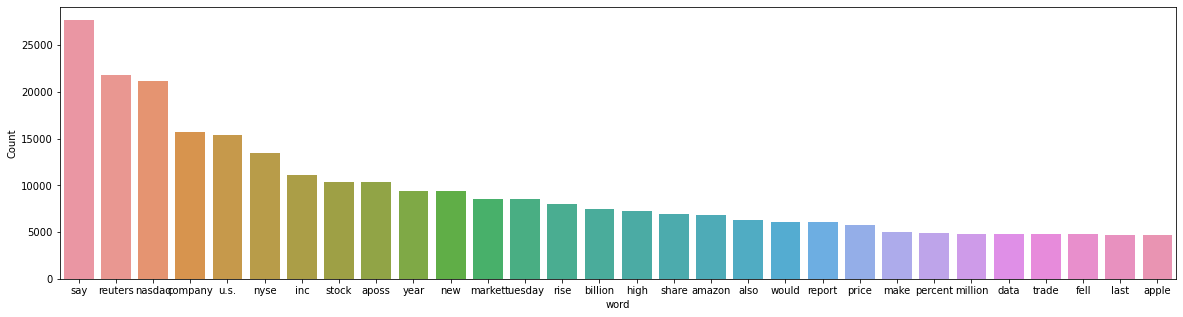

In [123]:
freq_words(df['title/clean'])

In [130]:
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=5, max_features=1000, stop_words='english')
tf = tf_vectorizer.fit_transform(df['title/clean'].tolist())
tf_feature_names = tf_vectorizer.get_feature_names_out()

In [132]:
lda = LatentDirichletAllocation(n_components=7, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

In [143]:
for i,topic in enumerate(lda.components_):
    print(f'Top 10 words for topic #{i}:')
    print([tf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])

Top 10 words for topic #0:
['american', 'nasdaq', 'covid19', 'health', 'airline', 'tuesday', 'nyse', 'reuters', 'airlines', 'say']
Top 10 words for topic #1:
['week', 'tax', 'new', 'president', 'china', 'bank', 'year', 'market', 'reuters', 'say']
Top 10 words for topic #2:
['report', 'price', 'analyst', 'sale', 'revenue', 'quarter', 'share', 'billion', 'company', 'year']
Top 10 words for topic #3:
['software', 'network', 'service', 'compromise', 'data', 'aposs', 'company', 'reuters', 'amazon', 'say']
Top 10 words for topic #4:
['close', 'gain', 'point', 'fell', '500', 'high', 'rise', 'stock', 'nyse', 'nasdaq']
Top 10 words for topic #5:
['musk', 'tuesday', 'law', 'security', 'new', 'nasdaq', 'apple', 'company', 'reuters', 'say']
Top 10 words for topic #6:
['share', 'amazon', 'new', 'year', 'billion', 'reuters', 'company', 'percent', 'say', 'aposs']


In [144]:
doc_term_matrix = tf_vectorizer.fit_transform(df['title/clean'].values.astype('U'))

In [147]:
topic_values = lda.transform(doc_term_matrix)
topic_values.shape

(6364, 7)

In [148]:
df['Topic'] = topic_values.argmax(axis=1)
df

,Symbol,Article,Date,title/no_stopwords,title/clean,Topic
0,MO,The other big story Monday was oil storming h...,2022-03-22,"[big, story, monday, oil, storm, high, 6, decl...",big story monday oil storm high 6 decline last...,2
1,MO,By Peter NurseInvesting.com -- Stocks in focu...,2022-03-22,"[peter, nurse, stocks, focus, premarket, trade...",peter nurse stocks focus premarket trade tuesd...,4
2,MO,The members of this alcohol and tobacco indus...,2022-03-17,"[member, alcohol, tobacco, industrybacked, mar...",member alcohol tobacco industrybacked marijuan...,1
3,MO,(Reuters) - An administrative law judge dismi...,2022-02-24,"[reuters, administrative, law, judge, dismiss,...",reuters administrative law judge dismiss feder...,5
4,MO,WASHINGTON (Reuters) -A judge at the U.S. Fed...,2022-02-15,"[washington, reuters, judge, u.s., federal, tr...",washington reuters judge u.s. federal trade co...,6
...,...,...,...,...,...,...
6365,AAPL,By Stephen Nellis(Reuters) - If Nvidia Corp ...,2020-10-07,"[stephen, nellis, reuters, nvidia, corp, nvda,...",stephen nellis reuters nvidia corp nvda buy ar...,3
6366,AAPL,By Yasin EbrahimInvesting.com – The Dow ralli...,2020-10-07,"[yasin, ebrahim, dow, rally, wednesday, lead, ...",yasin ebrahim dow rally wednesday lead surge a...,4
6367,AAPL,By Geoffrey Smith Investing.com -- Donald Tru...,2020-10-06,"[geoffrey, smith, donald, trump, return, white...",geoffrey smith donald trump return white house...,1
6368,AAPL,By Sruthi Shankar(Reuters) - European stocks ...,2020-10-06,"[sruthi, shankar, reuters, european, stock, ea...",sruthi shankar reuters european stock ease two...,1


In [ ]:
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda, tf, tf_vectorizer)

/Users/ryanshintaku/opt/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/ryanshintaku/opt/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/ryanshintaku/opt/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/ryanshintaku/opt/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/ryanshintaku/opt/anaconda3/lib/python3.8/

In [151]:
df

,Symbol,Article,Date,title/no_stopwords,title/clean,Topic
0,MO,The other big story Monday was oil storming h...,2022-03-22,"[big, story, monday, oil, storm, high, 6, decl...",big story monday oil storm high 6 decline last...,2
1,MO,By Peter NurseInvesting.com -- Stocks in focu...,2022-03-22,"[peter, nurse, stocks, focus, premarket, trade...",peter nurse stocks focus premarket trade tuesd...,4
2,MO,The members of this alcohol and tobacco indus...,2022-03-17,"[member, alcohol, tobacco, industrybacked, mar...",member alcohol tobacco industrybacked marijuan...,1
3,MO,(Reuters) - An administrative law judge dismi...,2022-02-24,"[reuters, administrative, law, judge, dismiss,...",reuters administrative law judge dismiss feder...,5
4,MO,WASHINGTON (Reuters) -A judge at the U.S. Fed...,2022-02-15,"[washington, reuters, judge, u.s., federal, tr...",washington reuters judge u.s. federal trade co...,6
...,...,...,...,...,...,...
6365,AAPL,By Stephen Nellis(Reuters) - If Nvidia Corp ...,2020-10-07,"[stephen, nellis, reuters, nvidia, corp, nvda,...",stephen nellis reuters nvidia corp nvda buy ar...,3
6366,AAPL,By Yasin EbrahimInvesting.com – The Dow ralli...,2020-10-07,"[yasin, ebrahim, dow, rally, wednesday, lead, ...",yasin ebrahim dow rally wednesday lead surge a...,4
6367,AAPL,By Geoffrey Smith Investing.com -- Donald Tru...,2020-10-06,"[geoffrey, smith, donald, trump, return, white...",geoffrey smith donald trump return white house...,1
6368,AAPL,By Sruthi Shankar(Reuters) - European stocks ...,2020-10-06,"[sruthi, shankar, reuters, european, stock, ea...",sruthi shankar reuters european stock ease two...,1


In [176]:
daily_prices = pd.read_csv('daily_prices.csv')
daily_prices

,Date,Open,High,Low,Close,Volume,Symbol
0,2014-04-09,107.283329,107.974706,106.885983,107.950867,2671900.0,MMM
1,2014-04-10,107.863458,108.419740,106.409171,106.464806,2857200.0,MMM
2,2014-04-11,105.988008,106.361514,105.209213,105.209213,2368200.0,MMM
3,2014-04-14,106.051558,106.107193,104.915156,105.813148,2058100.0,MMM
4,2014-04-15,105.908540,106.766808,104.915176,106.560181,2119000.0,MMM
...,...,...,...,...,...,...,...
1000210,2022-04-04,191.139999,191.979996,187.179993,188.740005,2603600.0,ZTS
1000211,2022-04-05,188.740005,190.740005,187.690002,188.399994,2059300.0,ZTS
1000212,2022-04-06,188.160004,192.330002,186.520004,191.380005,2843500.0,ZTS
1000213,2022-04-07,191.199997,199.339996,190.970001,197.929993,2781400.0,ZTS


In [188]:
current_price = []
for i in range(len(df)):
    if i % 500 == 0:
        print(i)
    if i % 2000 == 0:
        clear_output(wait = True)
    subset = daily_prices[(daily_prices['Date'] <= str(df.iloc[i]['Date'])[0: 10]) & (df.iloc[i]['Symbol'] == daily_prices['Symbol'])]
    if len(subset) == 0:
        current_price.append(np.nan)
        continue
    subset = subset[subset['Date'] == max(subset['Date'])]
    current_price.append(subset.iloc[0]['Close'])
current_price[0]

52.40848159790039

In [190]:
df['current_price'] = current_price
df

,Symbol,Article,Date,title/no_stopwords,title/clean,Topic,current_price
0,MO,The other big story Monday was oil storming h...,2022-03-22,"[big, story, monday, oil, storm, high, 6, decl...",big story monday oil storm high 6 decline last...,2,52.408482
1,MO,By Peter NurseInvesting.com -- Stocks in focu...,2022-03-22,"[peter, nurse, stocks, focus, premarket, trade...",peter nurse stocks focus premarket trade tuesd...,4,52.408482
2,MO,The members of this alcohol and tobacco indus...,2022-03-17,"[member, alcohol, tobacco, industrybacked, mar...",member alcohol tobacco industrybacked marijuan...,1,50.815872
3,MO,(Reuters) - An administrative law judge dismi...,2022-02-24,"[reuters, administrative, law, judge, dismiss,...",reuters administrative law judge dismiss feder...,5,48.731728
4,MO,WASHINGTON (Reuters) -A judge at the U.S. Fed...,2022-02-15,"[washington, reuters, judge, u.s., federal, tr...",washington reuters judge u.s. federal trade co...,6,49.469044
...,...,...,...,...,...,...,...
6365,AAPL,By Stephen Nellis(Reuters) - If Nvidia Corp ...,2020-10-07,"[stephen, nellis, reuters, nvidia, corp, nvda,...",stephen nellis reuters nvidia corp nvda buy ar...,3,114.032623
6366,AAPL,By Yasin EbrahimInvesting.com – The Dow ralli...,2020-10-07,"[yasin, ebrahim, dow, rally, wednesday, lead, ...",yasin ebrahim dow rally wednesday lead surge a...,4,114.032623
6367,AAPL,By Geoffrey Smith Investing.com -- Donald Tru...,2020-10-06,"[geoffrey, smith, donald, trump, return, white...",geoffrey smith donald trump return white house...,1,112.130119
6368,AAPL,By Sruthi Shankar(Reuters) - European stocks ...,2020-10-06,"[sruthi, shankar, reuters, european, stock, ea...",sruthi shankar reuters european stock ease two...,1,112.130119


In [193]:
# two weeks from current date
next_price = []
for i in range(len(df)):
    if i % 500 == 0:
        print(i)
    if i % 2000 == 0:
        clear_output(wait = True)
    next_date = df.iloc[i]['Date'] + pd.DateOffset(days = 14)
    next_date = str(next_date)[0:10]
    subset = daily_prices[(daily_prices['Date'] <= next_date) & (df.iloc[i]['Symbol'] == daily_prices['Symbol'])]
    if len(subset) == 0:
        next_price.append(np.nan)
        continue
    subset = subset[subset['Date'] == max(subset['Date'])]
    if subset.iloc[0]['Date'] <= str(df.iloc[i]['Date'] + pd.DateOffset(days = 7))[0:10]:
        next_price.append(np.nan)
        continue
    next_price.append(subset.iloc[0]['Close'])
next_price[0]

52.63999938964844

In [196]:
df['next_price'] = next_price
df

,Symbol,Article,Date,title/no_stopwords,title/clean,Topic,current_price,next_price
0,MO,The other big story Monday was oil storming h...,2022-03-22,"[big, story, monday, oil, storm, high, 6, decl...",big story monday oil storm high 6 decline last...,2,52.408482,52.639999
1,MO,By Peter NurseInvesting.com -- Stocks in focu...,2022-03-22,"[peter, nurse, stocks, focus, premarket, trade...",peter nurse stocks focus premarket trade tuesd...,4,52.408482,52.639999
2,MO,The members of this alcohol and tobacco indus...,2022-03-17,"[member, alcohol, tobacco, industrybacked, mar...",member alcohol tobacco industrybacked marijuan...,1,50.815872,52.250000
3,MO,(Reuters) - An administrative law judge dismi...,2022-02-24,"[reuters, administrative, law, judge, dismiss,...",reuters administrative law judge dismiss feder...,5,48.731728,50.363655
4,MO,WASHINGTON (Reuters) -A judge at the U.S. Fed...,2022-02-15,"[washington, reuters, judge, u.s., federal, tr...",washington reuters judge u.s. federal trade co...,6,49.469044,50.697903
...,...,...,...,...,...,...,...,...
6365,AAPL,By Stephen Nellis(Reuters) - If Nvidia Corp ...,2020-10-07,"[stephen, nellis, reuters, nvidia, corp, nvda,...",stephen nellis reuters nvidia corp nvda buy ar...,3,114.032623,115.806328
6366,AAPL,By Yasin EbrahimInvesting.com – The Dow ralli...,2020-10-07,"[yasin, ebrahim, dow, rally, wednesday, lead, ...",yasin ebrahim dow rally wednesday lead surge a...,4,114.032623,115.806328
6367,AAPL,By Geoffrey Smith Investing.com -- Donald Tru...,2020-10-06,"[geoffrey, smith, donald, trump, return, white...",geoffrey smith donald trump return white house...,1,112.130119,116.440514
6368,AAPL,By Sruthi Shankar(Reuters) - European stocks ...,2020-10-06,"[sruthi, shankar, reuters, european, stock, ea...",sruthi shankar reuters european stock ease two...,1,112.130119,116.440514


In [202]:
df = df.dropna()
df

,Symbol,Article,Date,title/no_stopwords,title/clean,Topic,current_price,next_price
0,MO,The other big story Monday was oil storming h...,2022-03-22,"[big, story, monday, oil, storm, high, 6, decl...",big story monday oil storm high 6 decline last...,2,52.408482,52.639999
1,MO,By Peter NurseInvesting.com -- Stocks in focu...,2022-03-22,"[peter, nurse, stocks, focus, premarket, trade...",peter nurse stocks focus premarket trade tuesd...,4,52.408482,52.639999
2,MO,The members of this alcohol and tobacco indus...,2022-03-17,"[member, alcohol, tobacco, industrybacked, mar...",member alcohol tobacco industrybacked marijuan...,1,50.815872,52.250000
3,MO,(Reuters) - An administrative law judge dismi...,2022-02-24,"[reuters, administrative, law, judge, dismiss,...",reuters administrative law judge dismiss feder...,5,48.731728,50.363655
4,MO,WASHINGTON (Reuters) -A judge at the U.S. Fed...,2022-02-15,"[washington, reuters, judge, u.s., federal, tr...",washington reuters judge u.s. federal trade co...,6,49.469044,50.697903
...,...,...,...,...,...,...,...,...
6365,AAPL,By Stephen Nellis(Reuters) - If Nvidia Corp ...,2020-10-07,"[stephen, nellis, reuters, nvidia, corp, nvda,...",stephen nellis reuters nvidia corp nvda buy ar...,3,114.032623,115.806328
6366,AAPL,By Yasin EbrahimInvesting.com – The Dow ralli...,2020-10-07,"[yasin, ebrahim, dow, rally, wednesday, lead, ...",yasin ebrahim dow rally wednesday lead surge a...,4,114.032623,115.806328
6367,AAPL,By Geoffrey Smith Investing.com -- Donald Tru...,2020-10-06,"[geoffrey, smith, donald, trump, return, white...",geoffrey smith donald trump return white house...,1,112.130119,116.440514
6368,AAPL,By Sruthi Shankar(Reuters) - European stocks ...,2020-10-06,"[sruthi, shankar, reuters, european, stock, ea...",sruthi shankar reuters european stock ease two...,1,112.130119,116.440514
